# Linear Regression 

<img src="linearModel.jpg.png"/>

### Important topics to explore

-  What is the standard and abbreviations used for the algorithm?

-  What is the information processing strategy of the algorithm?

-  What is the objective or goal for the algorithm?

-  What metaphors or analogies are commonly used to describe the behavior of the algorithm?

-  What is the pseudocode or flowchart description of the algorithm?

-  What are the heuristics or rules of thumb for using the algorithm?

-  What classes of problem is the algorithm well suited?

-  What are common benchmark or example datasets used to demonstrate the algorithm?

-  What are useful resources for learning more about the algorithm?

-  What are the primary references or resources in which the algorithm was first described?

## What is Linear Regression
- Linear reggresion is fitting a line to a data to find the relationship between one target (dependent / output) variable and one or more explanatory (independent / input) variables.
- If we have only one independent (input) variable then it is called **Simple Linear Regression**
- If we have more than one independent (input) variables then it is called **Multiple Linear Regression**
- If we have good relationship hypothesis then we can predict target variables for the independent variables that are unknown to our model.


## Simple Linear Regression

In Simple linear regression our model is a simple linear equation with two parameters $\theta_0$ and $\theta_1$
\begin{equation*}
h(x) = \theta_0 * x + \theta_1
\end{equation*}


We can compare this equation to the equation of line
\begin{equation*}
y = m * x + c
\end{equation*}
where **m** is the slope of line and **c** is the point where the line crosses **y-axis**. It means if we know the slop of line and **y-intercept** of the line then we can predict **y** for and given **x**. 

## How to find a line that fits best to our data?
To find a line that fits best to our data we need to change the parameters ($\theta_0$, $\theta_1$), so that the line will fit to data perfectly.

## How we know the line is perfect fit to our data?
To evaluate our model we will use **Mean Squared Error (MSE) Cost Function**

If we have **m** data points **{$(x_0, y_0),(x_1, y_1),...,(x_i, y_i),...,(x_m, y_m)$}** then the cost function of $(\theta_0, \theta_1)$ will be
\begin{equation*}
C(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m(h(x_i) - y_i)^2
\end{equation*}
Now our goal is to choose the parameters $(\theta_0, \theta_1)$ so that the value of cost function **C($\theta_0, \theta_1$)** should be minimum.

## Simplified Hypothesis
Our hypothesis is
\begin{equation*}
h(x) = \theta_0 * x + \theta_1
\end{equation*}

If $\theta_1 = 0$ then, our hypothesis will be
\begin{equation*}
h(x) = \theta_0 * x
\end{equation*}

Now this is a line which passes through the origin.

Now we have two function to analyze our hypothesis **h(x)** and cost function **C($\theta_0$)**.
We can choose different values of $\theta_0$ to minimize our cost funtion.
Let suppose we have following data points:

X = [1,2,3,4]

Y = [1,2,3,4]

And we choose following values for $\theta_0$

$\theta$ = [0, 0.5, 1, 1.5, 2, 2.5]

### Analysis of two functions h(x) and C($\theta_0$) according to the different values of $\theta$

<IPython.core.display.Javascript object>


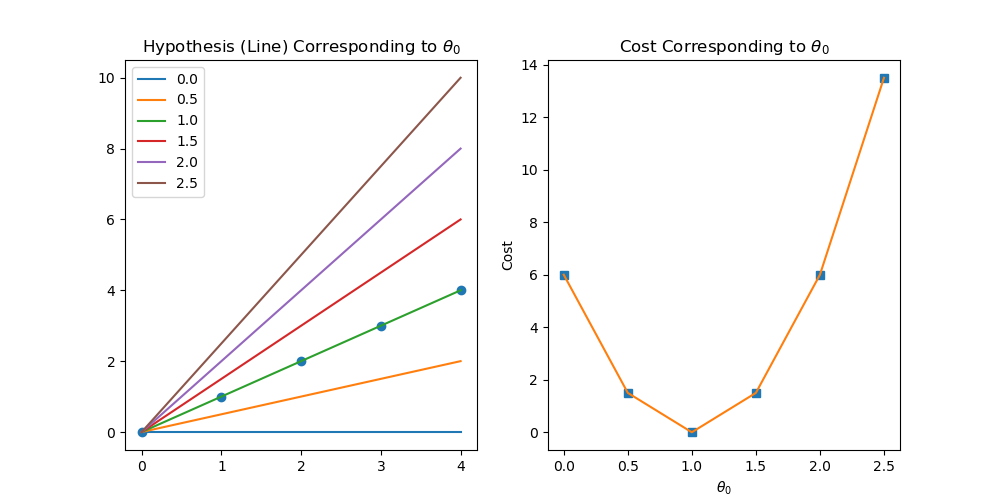

Text(0.5,1,'Cost Corresponding to $\\theta_0$')

In [139]:
# Import libraries for numeric tasks and ploting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Removing unneccesary warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib notebook

fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.subplots_adjust(bottom=0.1)

# temporary data for fitting a line
X = np.array([0,1, 2, 3, 4])
Y = np.array([0,1, 2, 3, 4])

# manuaaly select some values for parameter
Theta = np.array([0, 0.5, 1, 1.5, 2, 2.5])

axes[0].scatter(X,Y)

Cost = []

for i in range(len(Theta)):
    h = Theta[i] * X
    axes[0].plot(h)
    Cost.append(sum((h-Y)**2)/len(X))

axes[0].legend(Theta, loc='best')
axes[0].set_title("Hypothesis (Line) Corresponding to {}".format(r"$\theta_0$"))

axes[1].plot(Theta,Cost,'s')
axes[1].plot(Theta,Cost)

axes[1].set_xlabel(r"$\theta_0$")
axes[1].set_ylabel("Cost")
axes[1].set_title("Cost Corresponding to {}".format(r"$\theta_0$"))



We can see from the figure that for $\theta_0 = 1$ the cost $C(\theta_0) = 0$ (minimum)
So the best hypothesis for this data will be:

\begin{equation*}
h(x) = 1 * x
\end{equation*}

But we can not select the best parameters for big datasets manually. We need a method to select the parameters that can minimize pur cost function. Method for selecting parameters to mimize the cost function is called **Gradient Descent**.

## Gradient Descent

We have a cost function

\begin{equation*}
C(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^m(h(x_i) - y_i)^2
\end{equation*}


Our goal is to minimize **C($\theta_0,\theta_1$)** by changing the values of $\theta_0$ and $\theta_1$

We can do this by changing the values of $\theta_0$ and $\theta_1$ untill we get minimum value of **C($\theta_0,\theta_1$)**

repeat untill minimum C($\theta_0,\theta_1$)
{
\begin{equation*}
    \theta_j = \theta_j - \alpha * \frac{\partial}{\partial\theta_j}C(\theta_0,\theta_1)
\end{equation*}
}
for simple linear regression: j =0 and j=1

Here $\alpha$ is called learning rate. By changing $\alpha$ we can control the size of each step taken by **Gradient Descent**.

If $\alpha$ is too small then **Gradient Descent** will take more time to optimize at some point.

If $\alpha$ is too large than **Gradient Descent** can miss the optimize value and may be diverge instead of converge.

But the problem is how we know which value is minimum?

This problem can be solved by observing the change in **Cost** in each step of Gradient Descent. We can define a variable (let suppose **Tmp = 0.001**). Now if the change in Gradient Descent in any step is less than **Tmp** then we will stop there.

#### For simple linear regression the Gradient Descent will be

 repeat untill minimum C($\theta_0,\theta_1$)
{
\begin{equation*}
    \theta_j = \theta_j - \alpha * \frac{\partial}{\partial\theta_j}[\frac{1}{m}\sum(h(x_i)-y_i)^2]
\end{equation*}
}
for j =0 and j=1

repeat untill minimum C($\theta_0,\theta_1$)
{
\begin{equation*}
for\ j=0:\    \theta_0 = \theta_0 - \alpha * \frac{\partial}{\partial\theta_0}[\frac{1}{m}\sum(h(x_i)-y_i)^2]
\end{equation*}

\begin{equation*}
for\ j=1:\    \theta_1 = \theta_1 - \alpha * \frac{\partial}{\partial\theta_1}[\frac{1}{m}\sum(h(x_i)-y_i)^2]
\end{equation*}
}

Where h(x) = $\theta_0 * x + \theta_1$

If we solve these partial differentials,we will get following equation for **Gradient Descent**

repeat untill minimum C($\theta_0,\theta_1$)
{
\begin{equation*}
for\ j=0:    \theta_0 = \theta_0 - \alpha * [\frac{2}{m}\sum(h(x_i)-y_i)]
\end{equation*}

\begin{equation*}
for\ j=1:    \theta_1 = \theta_1 - \alpha * [\frac{2}{m}\sum(h(x_i)-y_i)]*x_i
\end{equation*}
}

Where h(x) = $\theta_0 * x + \theta_1$

#### Optimizing Cost Funtion with Gradient Descent algorithm

<IPython.core.display.Javascript object>


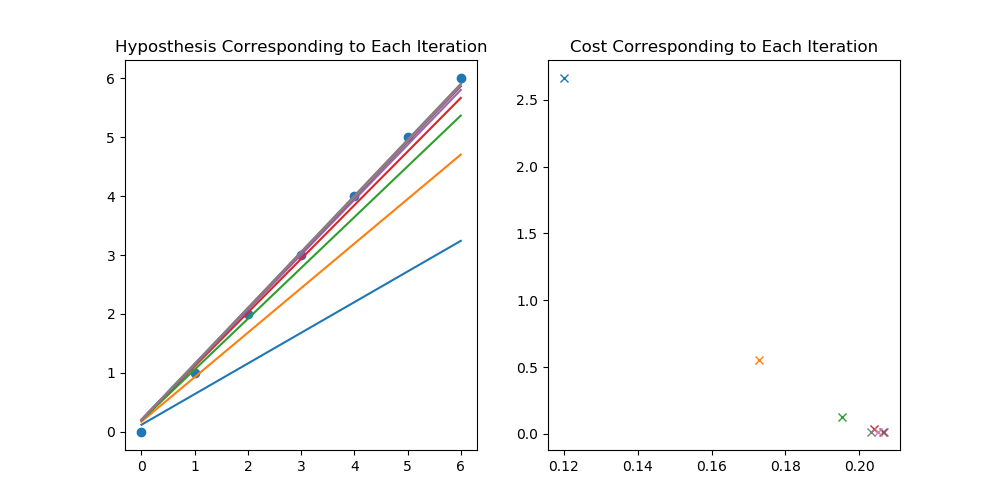

In [140]:
# Random dataset to perform linear regression
X = np.array([0,1,2,3,4,5,6])
Y = np.array([0,1,2,3,4,5,6])

fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.subplots_adjust(bottom=0.1)

axes[0].scatter(X,Y)

# No. of point in data
m = len(X)

# TMP variable to check change in GD
Tmp = 0.001

# Learning rate alpha
alpha = 0.02

# Initial values of parameters
theta0 = 0
theta1 = 0

# hypothesis
h = theta0 + theta1 * X

# initial cost
pre_cost = sum((h-Y)**2)/m

# to regulate the number of iterations
max_iter = 1000
iterNum = 0

#GD
while True:
    tmp0 = theta0 - 2*alpha * (sum((h-Y))/m)
    tmp1 = theta1 - 2*alpha * (sum(np.multiply((h-Y),X))/m)
    
    theta0 = tmp0
    theta1 = tmp1
    
    # current hypothesis
    h = theta0 + theta1 * X
    
    # current cost
    cur_cost = sum((h-Y)**2)/m
    
    axes[0].plot(h)
    axes[0].set_title('Hyposthesis Corresponding to Each Iteration')
    axes[1].plot(theta0,cur_cost,'x')
    axes[1].set_title('Cost Corresponding to Each Iteration')
    
    iterNum += 1
    
    if abs(cur_cost-pre_cost) <= Tmp or iterNum >= max_iter:
        break
    else:
        pre_cost = cur_cost

We can see from the figure, cost is decreasing as we change the parameter.

### Choosing the Learning Rate $\alpha$

<IPython.core.display.Javascript object>


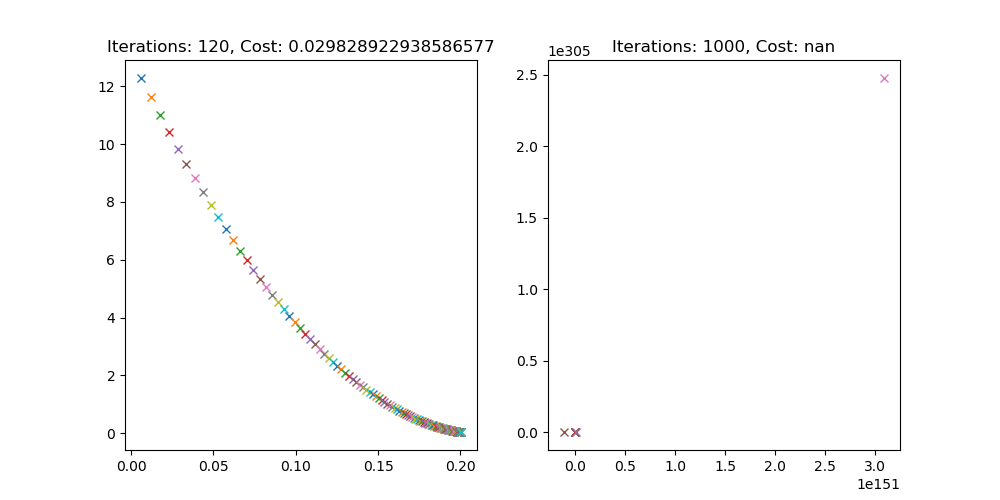

Text(0.5,1,'Iterations: 1000, Cost: nan')

In [142]:
# If Learning rate alpha is too small
alpha = 0.001

# to regulate the number of iterations
max_iter = 1000
iterNum = 0


# Initial values of parameters
theta0 = 0
theta1 = 0

# hypothesis
h = theta0 + theta1 * X

# initial cost
pre_cost = sum((h-Y)**2)/m

fig, axes = plt.subplots(1,2, figsize=(10,5))
fig.subplots_adjust(bottom=0.1)

#GD for if alpha is too small
while True:
    tmp0 = theta0 - 2*alpha * (sum((h-Y))/m)
    tmp1 = theta1 - 2*alpha * (sum(np.multiply((h-Y),X))/m)
    
    theta0 = tmp0
    theta1 = tmp1
    
    # current hypothesis
    h = theta0 + theta1 * X
    
    # current cost
    cur_cost = sum((h-Y)**2)/m
    
    axes[0].plot(theta0,cur_cost,'x')
    
    
    iterNum += 1
    
    if abs(cur_cost-pre_cost) <= Tmp or iterNum >= max_iter:
        break
    else:
        pre_cost = cur_cost
axes[0].set_title('Iterations: {}, Cost: {}'.format(iterNum,cur_cost))

# If Learning rate  is too large
alpha = 1

# to regulate the number of iterations
iterNum = 0


# Initial values of parameters
theta0 = 0
theta1 = 0

# hypothesis
h = theta0 + theta1 * X

# initial cost
pre_cost = sum((h-Y)**2)/m

#GD for if alpha is too small
while True:
    tmp0 = theta0 - 2*alpha * (sum((h-Y))/m)
    tmp1 = theta1 - 2*alpha * (sum(np.multiply((h-Y),X))/m)
    
    theta0 = tmp0
    theta1 = tmp1
    
    # current hypothesis
    h = theta0 + theta1 * X
    
    # current cost
    cur_cost = sum((h-Y)**2)/m
    
    axes[1].plot(theta0,cur_cost,'x')
    
    
    iterNum += 1
    
    if abs(cur_cost-pre_cost) <= Tmp or iterNum >= max_iter:
        break
    else:
        pre_cost = cur_cost
axes[1].set_title('Iterations: {}, Cost: {}'.format(iterNum,cur_cost))

- As we can see from first figure if $\alpha$ is too small then **Gradient Descent** will take more time to optimize the cost.
- And from the second figure we can see that if $\alpha$ is too large then it will fail to converge. It is overshooting the minimum and diverging.
- Hence we should be very carefull while choosing learning rate for Gradient Descent.

# Multiple Linear Regression
In multiple linear regression we have more than one explanatory variables(features).

### Hypothesis for multiple linear regression will be
\begin{equation*}
h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + . . . + \theta_n x_n
\end{equation*}

where n is number of features